<a href="https://colab.research.google.com/github/happysms/Machine-Learning/blob/main/machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 자료
- 단층 퍼셉트론 : https://untitledtblog.tistory.com/27
- np.where문 사용법 : https://pinkwink.kr/1236
```
# zip 함수 example
Number = [1,2,3,4]
Name = ['hong','gil','dong','nim']
Number_Name = list(zip(Number,name))
print(Number_Name)
결과 : [(1 ,'hong'), (2 ,'gil'), (3 ,'dong'), (4 ,'nim')]

- 클래스 레이블 : 특정 벡터를 머신러닝 모델에 통과 시켰을 때 도출되기를 기대하는 정답, 레이블과 클래스 둘 다 혼용되는 용어임


In [ ]:
pip install numpy

In [ ]:
# 퍼셉트론의 구현

import numpy as np

class Perceptron(object):
  """퍼셉트론 분류기

  매개변수
  ------------
  eta : float
    학습률(0.0과 1.0 사이)

  n_iter : int
    훈련 데이터셋 반복 횟수

  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드
  
  속성
  ----------
  w_ : 1d-array
    학습된 가중치
  errors_ : list
    에포크마다 누적된 분류 오류 
  """

  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  
  def fit(self, X, y):

    """훈련 데이터 학습
      
    매개변수
    ------------
    X : {array-like} , shape = [n_samples , n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    
    y : array-like, shape = [n_samples]
      타깃 값

    반환값
    -------
    self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0 , scale = 0.01 , size = 1 + X.shape[1])
    # X.shape[1]로 벡터의 차원확인
    
    # scale = 0.01 -> 표준편차가 0.01인 정규 분포 -> 특별한 이유 없이 벡터의 모든 원소가 0이 됨을 피하기 위해.

    # rgen 넘파이 난수 생성기로 사용자가 지정한 랜덤 시드로 이전과 동일한 결과를 재현할 수 있다.
    
    # 가중치를 1로 초기화 하지 않는 이유는 가중치가 0이 아니여야 학습률이 분류 결과에 영향을 준다... 
    # ... 가중치가 만약 0으로 초기화 되어 있다면 학습률 파라미터 eta는 가중치 벡터의 방향이 아니라...
    # ... 크기에만 영향을 미친다. -> 가중치가 없다면 벡터의 사이의 값은 0 이 될 수 있기에 방향에는 영향을 주지 않는다. 
    # ... 아래 코드로 예시를 달아놓음. 
  
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    
    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환한다"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)   # where 문 사용법 맨 위 참고

    
  




In [ ]:
import numpy as np

v1 = np.array([1,2,3])
v2 = 0.5 * v1

# 벡터 사이의 각도 공식 적용 cos(세타) = x.dot(y) / norm(x) * norm(y)  
# np.linalg.norm 벡터의 norm , 벡터의 길이를 구해주는 식
n = np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))) 
print(n)

0.0


In [16]:
# 과제 파일
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# CSV 파일을 읽기
X, y = [], []

with open('/content/drive/MyDrive/Colab Notebooks/dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


In [17]:
import random

# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

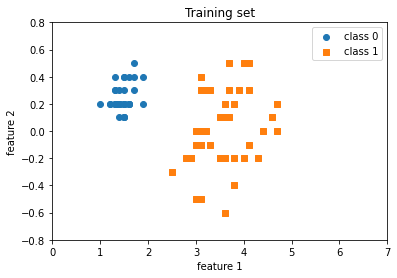

In [18]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()